<a href="https://colab.research.google.com/github/A-Roopa/Bharat-Intern-Task-1/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Imports and Setup**

In [29]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)


True

**Load the dataset**

In [15]:
# Load the dataset
df = pd.read_csv('/content/spam classifier.csv', encoding='latin-1')



In [16]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [17]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


**Step 2: Data Preprocessing**

In [18]:
# Drop the unnecessary columns (Unnamed: 2, Unnamed: 3, Unnamed: 4)
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df_cleaned

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Optionally, save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [19]:

# Advanced text preprocessing
def preprocess_text(text, use_stemming=False):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)





**Step 3: Data Preparation**

In [22]:
# Create two versions of processed messages: one with lemmatization and one with stemming
df['processed_message_lemma'] = df['v2'].apply(lambda x: preprocess_text(x, use_stemming=False))
df['processed_message_stem'] = df['v2'].apply(lambda x: preprocess_text(x, use_stemming=True))
df['processed_message_stem']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: processed_message_stem, Length: 5572, dtype: object

In [23]:
# Prepare the data for classification
X_lemma = df['processed_message_lemma']
X_stem = df['processed_message_stem']
y = df['v1'].map({'ham': 0, 'spam': 1})


In [24]:
# Split the data
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(X_lemma, y, test_size=0.2, random_state=42)
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stem, y, test_size=0.2, random_state=42)

**Step 4: Pipeline and Parameter Grid Setup**

In [25]:
# Create pipelines for different classifiers
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC())
])

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

In [26]:
# Define parameter grids for each classifier
svm_param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear']
}

rf_param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

nb_param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0]
}

**Step 5: Grid Search Function**


In [27]:
# Function to perform grid search and print results
def grid_search_classifier(pipeline, param_grid, X_train, y_train, X_test, y_test, name):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

    y_pred = grid_search.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return grid_search.best_estimator_

**Step 6: Grid Search with Lemmatized Text**

Results with lemmatized text:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVM (Lemma):
{'classifier__C': 1, 'classifier__kernel': 'linear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Best cross-validation score: 0.9832

Classification Report for SVM (Lemma):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



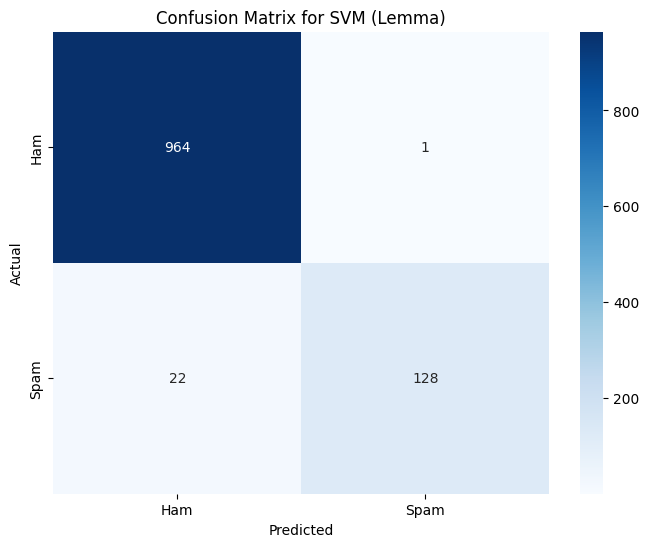

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest (Lemma):
{'classifier__max_depth': None, 'classifier__n_estimators': 200, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}

Best cross-validation score: 0.9753

Classification Report for Random Forest (Lemma):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



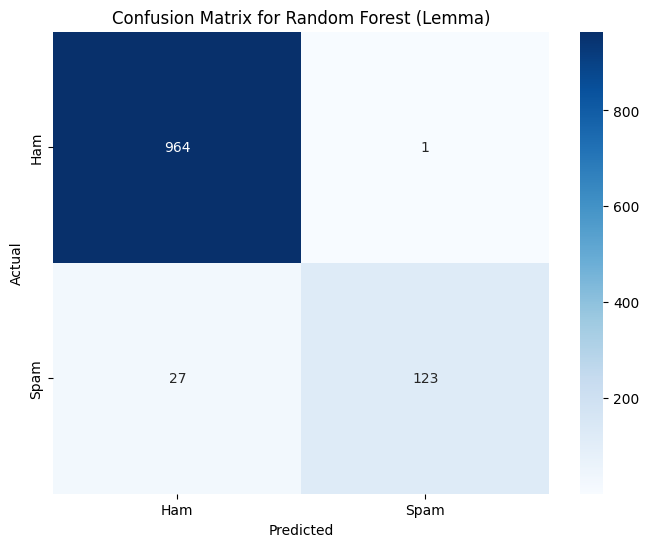

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Naive Bayes (Lemma):
{'classifier__alpha': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Best cross-validation score: 0.9816

Classification Report for Naive Bayes (Lemma):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



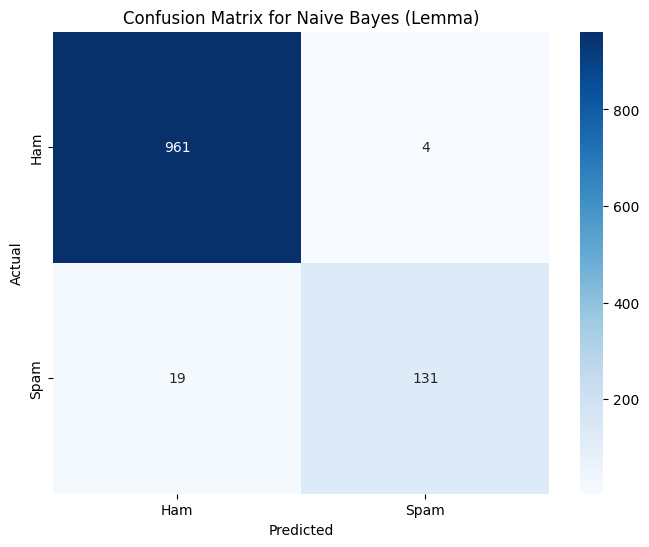

In [30]:
# Perform grid search for each classifier with lemmatized text
print("Results with lemmatized text:")
svm_best_lemma = grid_search_classifier(svm_pipeline, svm_param_grid, X_train_lemma, y_train_lemma, X_test_lemma, y_test_lemma, "SVM (Lemma)")
rf_best_lemma = grid_search_classifier(rf_pipeline, rf_param_grid, X_train_lemma, y_train_lemma, X_test_lemma, y_test_lemma, "Random Forest (Lemma)")
nb_best_lemma = grid_search_classifier(nb_pipeline, nb_param_grid, X_train_lemma, y_train_lemma, X_test_lemma, y_test_lemma, "Naive Bayes (Lemma)")


**Step 7: Grid Search with Stemmed Text**


Results with stemmed text:
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVM (Stem):
{'classifier__C': 1, 'classifier__kernel': 'linear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Best cross-validation score: 0.9836

Classification Report for SVM (Stem):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



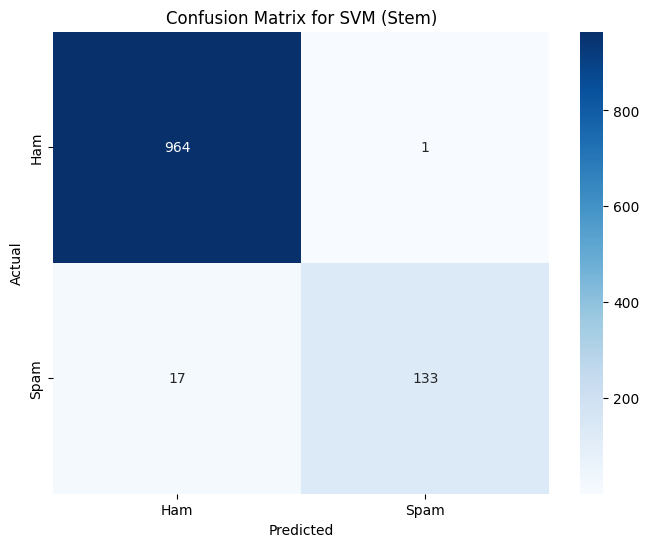

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest (Stem):
{'classifier__max_depth': None, 'classifier__n_estimators': 200, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}

Best cross-validation score: 0.9744

Classification Report for Random Forest (Stem):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



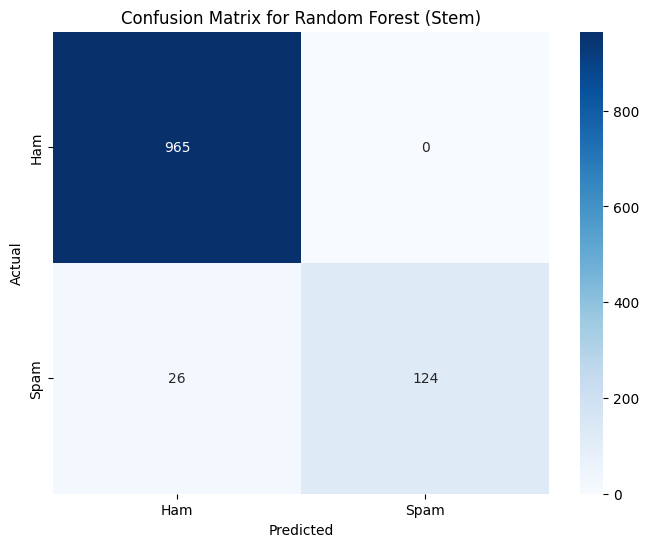

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Naive Bayes (Stem):
{'classifier__alpha': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Best cross-validation score: 0.9829

Classification Report for Naive Bayes (Stem):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



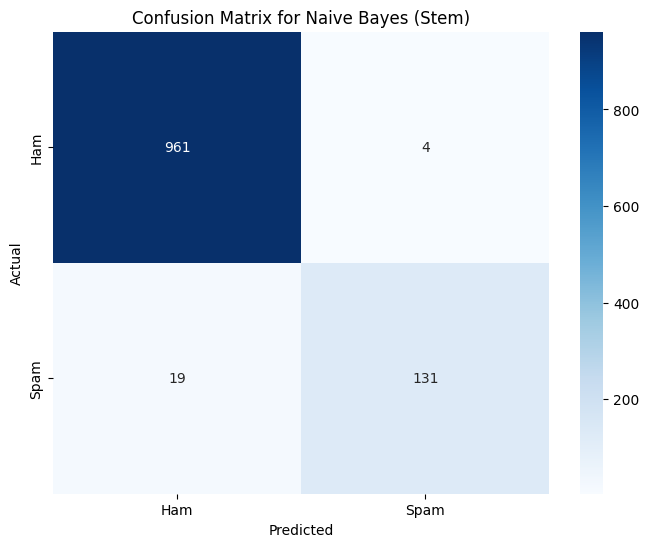

In [31]:
# Perform grid search for each classifier with stemmed text
print("\nResults with stemmed text:")
svm_best_stem = grid_search_classifier(svm_pipeline, svm_param_grid, X_train_stem, y_train_stem, X_test_stem, y_test_stem, "SVM (Stem)")
rf_best_stem = grid_search_classifier(rf_pipeline, rf_param_grid, X_train_stem, y_train_stem, X_test_stem, y_test_stem, "Random Forest (Stem)")
nb_best_stem = grid_search_classifier(nb_pipeline, nb_param_grid, X_train_stem, y_train_stem, X_test_stem, y_test_stem, "Naive Bayes (Stem)")


**Step 8: Spam Prediction Function**

In [32]:
# Function to predict spam using the best model
def predict_spam(message, model, use_stemming=False):
    processed_message = preprocess_text(message, use_stemming)
    return model.predict([processed_message])[0]

Step 9: Example Usage


In [35]:
# Example usage (assuming SVM with lemmatization performed best)
new_message = "Go until jurong point, crazy.. Available only .."
result = predict_spam(new_message, svm_best_lemma)
print("Spam" if result == 1 else "Not Spam")

Not Spam
